# fig4paper-ex2

## Configuration

In [1]:
%precision 4
%load_ext autoreload
%autoreload 2
%load_ext version_information
from IPython.display import display
%matplotlib inline

In [2]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.6.4 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.2.1
OS Windows 10 10.0.17134 SP0
numpy 1.14.0
scipy 1.0.0
matplotlib 2.1.2
Wed Aug 01 14:49:14 2018 ???? (?W???)

In [3]:
from os import path
import numpy as np
from scipy.integrate import odeint
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [4]:
%run conf_fig

In [5]:
mpl.RcParams.update(style)

## Solving ODE 

Set
$$
A = \begin{pmatrix}
    \alpha + \beta \cos \theta (t) 
    & \beta \left[\sin \theta(t) - \frac{2}{\sin \theta (t)}\right]\\
    \beta \sin \theta (t)
    & \alpha - \beta \cos \theta(t)
\end{pmatrix},
$$

where $\theta (t) = \frac{3 \pi}{8} + \frac{\pi}{8}\cos (\omega t)$.

We consider 
$$
\dfrac{du}{dt} = A u.
$$



In [6]:
def A(y,t,alpha, beta, omega):
    theta = (3.0*np.pi/8.0 
             + np.pi/8.0*np.cos(omega*t))
    cos = np.cos(theta)
    sin = np.sin(theta)
    return (
        (alpha + beta*cos)*y[0] + 
            beta*(sin - 2.0/sin)*y[1],
        beta*sin*y[0] + (alpha - beta*cos)*y[1]
            )

In [7]:
y0 = [1.0, 0.0]
t = np.linspace(0., 20., 401)
y = odeint(A, y0, t, args=(-0.1, 1.0, 2.0))

In [8]:
nrm = linalg.norm(y, axis=-1)

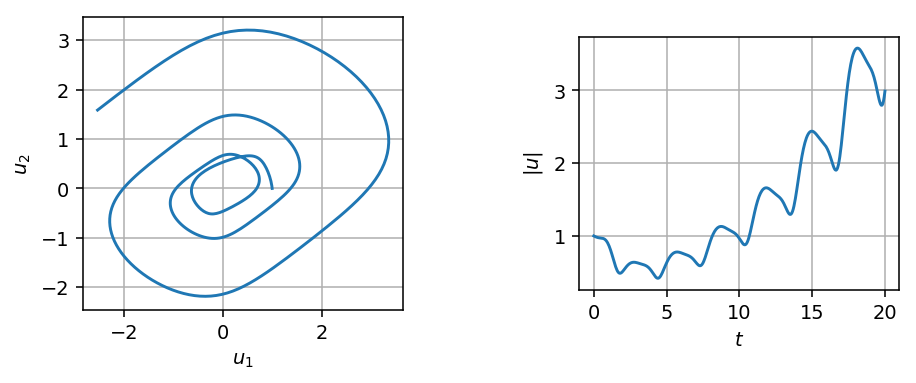

In [9]:
fig = plt.figure(figsize=(width_1col,0.7*width_1col),
                dpi=140
                )
gs = gridspec.GridSpec(1,2)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax1.plot(y[:,0], y[:,1])
ax1.set_aspect(1.0)
ax1.grid(True)
ax1.set_xlabel(r'$u_1$')
ax1.set_ylabel(r'$u_2$')
ax2.plot(t,nrm)
ax2.set_aspect(5.0)
ax2.grid(True)
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$|u|$')

gs.tight_layout(fig,
               w_pad=5.0,
               rect=(0.,0.,0.95,1.0))

In [10]:
fname = path.join('..','figs', 'CE.pdf')
fig.savefig(fname)